# Multi-Class Image Classification

The following versions of libraries have been used in this question. Please make sure that you use the same versions as well:

- python: 3.7.*
- keras: 2.3.1 
- tensorflow: 2.4.*

The first part of this task includes a tutorial on how to use Keras for a simple classification of dogs and cats. We use [the official keras documentation](https://keras.io/examples/vision/image_classification_from_scratch/). The next part is extending this knowledge to a novel multi-class classification task.

## Script to download Alberta Wild Life Dataset
A copy of the dataset is also [available on Kaggle](https://www.kaggle.com/navidre/alberta-wildlife-dataset) for your reference. We will be using a zip file stored in cloud here:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# Downloading and unzipping tAhe urls.zip file containing the image urls
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1u2uZ71h6FKuhNwpsjDliRfz5EKBXmgfO' -O urls.zip
!unzip urls.zip

--2021-04-30 22:50:21--  https://docs.google.com/uc?export=download&id=1u2uZ71h6FKuhNwpsjDliRfz5EKBXmgfO
Resolving docs.google.com (docs.google.com)... 172.217.8.14, 2607:f8b0:4004:832::200e
Connecting to docs.google.com (docs.google.com)|172.217.8.14|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-8o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/r68lvsorr5c63vtlnpbirpg2ojvtpn64/1619823000000/07334224481093894294/*/1u2uZ71h6FKuhNwpsjDliRfz5EKBXmgfO?e=download [following]
--2021-04-30 22:50:22--  https://doc-10-8o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/r68lvsorr5c63vtlnpbirpg2ojvtpn64/1619823000000/07334224481093894294/*/1u2uZ71h6FKuhNwpsjDliRfz5EKBXmgfO?e=download
Resolving doc-10-8o-docs.googleusercontent.com (doc-10-8o-docs.googleusercontent.com)... 172.217.7.225, 2607:f8b0:4004:802::2001
Connecting to doc-10-8o-docs.googleusercontent.com (doc-10-8o-docs.googleuser

In [2]:
data_path="./drive/MyDrive/task3/"

In [3]:
# Script to downlaod the images in a folder called images
# There will be separate folders for each keyword
import os
import urllib.request
from tqdm.notebook import tqdm
import json
import sys
assert sys.version_info >= (3, 7)

keywords = ['snow_goose',
 'black_bear',
 'white_tail_deer',
 'wolf',
 'mountain_goat',
 'burrowing_owl',
 'great_horned_owl',
 'golden_eagle',
 'grizzly_bear',
 'mule_deer',
 'bald_eagle',
 'cougar',
 'canada_goose_bird',
 'river_otter',
 'bighorn_sheep',
 'moose',
 'bison',
 'caribou',
 'lynx',
 'pine_marten',
 'elk']

# Making sure the images folder exists
if not os.path.exists('./drive/MyDrive/task3/images'):
    os.makedirs('./drive/MyDrive/task3/images')

for keyword in keywords:
    # Loading the image links
    with open(f'./urls/{keyword}.json', 'r') as f:
        image_urls = json.load(f)

    # Checking if we have a folder with the name of the keyword
    if not os.path.exists(f'./drive/MyDrive/task3/images/{keyword}'):
        os.makedirs(f'./drive/MyDrive/task3/images/{keyword}')

    # Downloading images from the list
    for i in tqdm(range(len(image_urls)), desc=keyword):
      try:
          urllib.request.urlretrieve(image_urls[i], f'./drive/MyDrive/task3/images/{keyword}/{i}.jpg')
      except ConnectionResetError:
          print(f'*** ConnectionResetError: {image_urls[i]}')
          pass
      except:
          print(f'Unexpected error: {sys.exc_info()[0]}')
          print(f'Error happended in url: {image_urls[i]}')
          pass  

Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse1.mm.bing.net/th?id=OIP.uTlFaSi2mPd9Q8xAyTm_NQAAAA&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse1.mm.bing.net/th?id=OIP.mBabkI18VQseawf5w93khAHaFS&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse3.mm.bing.net/th?id=OIP.8rzwYKGWpppj8-ax--9GPAAAAA&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse3.mm.bing.net/th?id=OIP.VTr1vTDlgh_UZafVySzPBgHaFS&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse1.mm.bing.net/th?id=OIP.aeb7MRQbLVBIVZOJOaAhBQHaE7&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse2.mm.bing.net/th?id=OIP.Ljq4r1Qbla_BfkcbCnthXQHaFO&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse1.mm.bing.net/th?id=OIP.ysLG5noA65ezwExI6b6A

Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse4.mm.bing.net/th?id=OIP.Jo1RLwBnWtsnIS3w27CmmAHaFj&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse3.mm.bing.net/th?id=OIP.Q3CdIROVqJWFzTctIlKECwHaFj&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse4.mm.bing.net/th?id=OIP.VGzgVIhehy9t_dkh5FCZnwHaE8&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse2.mm.bing.net/th?id=OIP.TvNDuYmVljx6GGukKJsNZAHaE7&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse3.mm.bing.net/th?id=OIP.-_pfzYO-acm6XoD2AOgajgHaGz&pid=Api



Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse1.mm.bing.net/th?id=OIP.Zo-flcflE0QkfWYopC-elQHaGS&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse4.mm.bing.net/th?id=OIP._CF3MO-hKyyHUanxYg_QyAHaE8&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse3.mm.bing.net/th?id=OIP.NcZu3sgiYZv0htqU6U8h-gAAAA&pid=Api



Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse3.mm.bing.net/th?id=OIP.Pi3YTXtlraI5yYa2iojeIQHaHa&pid=Api



Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse4.mm.bing.net/th?id=OIP._MDXYI-ypbrHMlgp_7crFgHaHf&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse1.mm.bing.net/th?id=OIP.zmcDKjmr3Hg-OuqBIDDNEwHaFB&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse3.mm.bing.net/th?id=OIP.PQGComNgIP_vhqRFTn6IUwAAAA&pid=Api



Unexpected error: <class 'urllib.error.URLError'>
Error happended in url: https://tse3.mm.bing.net/th?id=OIP.ACNjZ79JSiQQhJWVIY6ZJAAAAA&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse3.mm.bing.net/th?id=OIP.ue-ROWihItiHllGwTnNd9QAAAA&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse4.mm.bing.net/th?id=OIP.Qoq9U2plzC6rHrRaONiutwHaGj&pid=Api



Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse2.mm.bing.net/th?id=OIP.Vpm2PO97VG1y1BeqHhzx0wHaFc&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse3.mm.bing.net/th?id=OIP.8CFDubPU_MOXAPApzuLXUgHaFj&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse3.mm.bing.net/th?id=OIP.BS2Tv3QwBxxpGysVQclZNQAAAA&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse1.mm.bing.net/th?id=OIP.w1hzGyaN0-CHPpThumw_YwHaMe&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse4.mm.bing.net/th?id=OIP._Mcj2hvkLwcyzgLsyXC0pQHaFh&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse4.mm.bing.net/th?id=OIP.VyIgQHgeUHf7_gYwxj7SKAHaEK&pid=Api



Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse4.mm.bing.net/th?id=OIP.xOS9T233YMLD25b6S5w84QHaEK&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse1.mm.bing.net/th?id=OIP.ag85pouhQK8oZNJ2lKLSxwHaFJ&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse4.mm.bing.net/th?id=OIP.LUvezJCJASHzoSJwgGfRjwHaE8&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse2.mm.bing.net/th?id=OIP.EvUv5qYYznC35GVW49MmeAHaEo&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse2.mm.bing.net/th?id=OIP.g93SdQy65L7gJXPvpW1zpAHaE7&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse4.mm.bing.net/th?id=OIP.I49i3xWNonDD4-EPHUsKuwHaED&pid=Api



Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse4.mm.bing.net/th?id=OIP.TEyFgIQB7tFT3hZN-nrF6AHaE2&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse4.mm.bing.net/th?id=OIP.xj2xCCnImV2PQaROziBBCAHaKQ&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse4.mm.bing.net/th?id=OIP.YHKWoUMrwb5Wq-a3HyhbvwHaE8&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse4.mm.bing.net/th?id=OIP.4cUKyEnDsbWLFlsnC5MDEgHaE8&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse1.mm.bing.net/th?id=OIP.IzFCErS0dsGN75lWFz6W5QHaFC&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse2.mm.bing.net/th?id=OIP.n2xWP0Q-NmwYNjggd-pDGAHaE8&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse2.mm.bing.net/th?id=OIP.UET3yvotliAoU_8UBBKc

Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse2.mm.bing.net/th?id=OIP.IWHp934HUVQ7moxtm2zyWwAAAA&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse4.mm.bing.net/th?id=OIP.p3E4Kw4jaFxzylI6i2y6QQHaE8&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse1.mm.bing.net/th?id=OIP.QAz0xy8PdS3dyubGeguVxQAAAA&pid=Api



Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse3.mm.bing.net/th?id=OIP.6V2uJR4DU-tIswLbgK2lHgHaFj&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse3.mm.bing.net/th?id=OIP.gcmoh93xymdtfNblNyL05QHaLH&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse3.mm.bing.net/th?id=OIP.xbWRX6pX8pbFm9YeRSGmYAHaF5&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse4.mm.bing.net/th?id=OIP.b23lqbhru2N4jbla5PJIXwHaF1&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse2.mm.bing.net/th?id=OIP.vYZXgVHqqRGZkuU6XeUAMwHaE8&pid=Api



Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse2.mm.bing.net/th?id=OIP.Q0D7ty6YVgzMZZdI56EQEAHaFj&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse2.mm.bing.net/th?id=OIP.g8yRSTQTsWNnp39Lky7uqwHaE7&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse4.mm.bing.net/th?id=OIP.eHMHjWAdxPyoLnVJOa6F6gHaE8&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse1.mm.bing.net/th?id=OIP.0q2lotDCB0ocDtrO4qDuPAHaEK&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse3.mm.bing.net/th?id=OIP.0rhvi7rex_7IYVVMFI4jGQHaEo&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse2.mm.bing.net/th?id=OIP.3rHwbZOU81od-udOb6P0-AHaEb&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse4.mm.bing.net/th?id=OIP.vAy_rfI5ZHxQltT3hEaR

Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse3.mm.bing.net/th?id=OIP.2pFbEQUKSEzjwrsK8LGp7AHaE8&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse2.mm.bing.net/th?id=OIP.wPsWS_j2IAvHKa6P_CoduwHaE7&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse4.mm.bing.net/th?id=OIP.9WaKwJXV7R1JrzT6zMOpuQHaLI&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse1.mm.bing.net/th?id=OIP.aeb7MRQbLVBIVZOJOaAhBQHaE7&pid=Api



Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse1.mm.bing.net/th?id=OIP.29cpSuONiZy5L0utOMe_eQHaFd&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse3.mm.bing.net/th?id=OIP.wyPHZJO2XbpoRUYCQL7wKQHaE8&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse1.mm.bing.net/th?id=OIP.05VKp1JAYmwKNQrKr28sCgHaEo&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse4.mm.bing.net/th?id=OIP.PbkjGfFx-ldHsyvYH-sClgHaFj&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse4.mm.bing.net/th?id=OIP.HE2b3ybNmVEIKm7oMSVOtQHaFj&pid=Api



Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse1.mm.bing.net/th?id=OIP.jYw1rxBSP3xn5zkkFSI_-QHaE7&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse3.mm.bing.net/th?id=OIP.AKqEHAHQ_ddOVHaxAq8O8wHaEo&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse2.mm.bing.net/th?id=OIP.56pEljIDY9iUN7Q2-XJGbQHaE7&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse1.mm.bing.net/th?id=OIP.e2FoJW79kW7eb34IenIgvAHaE7&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse3.mm.bing.net/th?id=OIP.0j3EiStpmB5ZN7udn6_HJQAAAA&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse2.mm.bing.net/th?id=OIP.CnjAXZWZGrkww100ziIJ0QAAAA&pid=Api



Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse3.mm.bing.net/th?id=OIP.3uIRNhABRADg1Hhj7-MWlwHaE8&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse3.mm.bing.net/th?id=OIP.4CNzGreerp-iJZi5yrDERQHaE7&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse2.mm.bing.net/th?id=OIP.JM8yv4X4sgsIVFEdywQjDAHaE8&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse1.mm.bing.net/th?id=OIP.ZjDDbhJNAQ3KOsMOHYeEPgAAAA&pid=Api



Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse1.mm.bing.net/th?id=OIP.qmqwdv69ziJDwfFx63WfvAHaFi&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse4.mm.bing.net/th?id=OIP.zksJ4waNX_zUqf-ETNTaMwHaE-&pid=Api



Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse4.mm.bing.net/th?id=OIP.81ys6cKnm2c5wyQE9ahRFQHaE8&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse2.mm.bing.net/th?id=OIP.1ySbwf_xeh6zTxymTizmIQHaE7&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse2.mm.bing.net/th?id=OIP.Un-KKtWJ8gtIsb78nhHNZQHaFj&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse1.mm.bing.net/th?id=OIP.whafz--lrooHzS6fE0K_ewAAAA&pid=Api



Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse1.mm.bing.net/th?id=OIP.HVVwxprUFpw6ebtOBRAlkwHaE8&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse1.mm.bing.net/th?id=OIP.xXBfa7O_rtWAFEuaB4Ek0AHaE8&pid=Api



Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse3.mm.bing.net/th?id=OIP.fzrGOATUYroKnpKKSG0YvAHaE7&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse2.mm.bing.net/th?id=OIP.06cbEmRdkX9W1eRB2-QfrQHaE6&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse2.mm.bing.net/th?id=OIP.yIHMBwRlID2SPmT3N0HjsgHaFj&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse1.mm.bing.net/th?id=OIP.T3_4ies-LCCQ0bwTCEWhqgHaFj&pid=Api



Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse3.mm.bing.net/th?id=OIP.Ja0t2_UBTLQm8kISSGlmawHaIu&pid=Api
Unexpected error: <class 'urllib.error.HTTPError'>
Error happended in url: https://tse2.mm.bing.net/th?id=OIP.0jMWf1Yb0gLZjyyANKV39wHaFj&pid=Api



In [4]:
!ls ./drive/MyDrive/task3/images

bald_eagle     canada_goose_bird  great_horned_owl  mule_deer	     wolf
bighorn_sheep  caribou		  grizzly_bear	    pine_marten
bison	       cougar		  lynx		    river_otter
black_bear     elk		  moose		    snow_goose
burrowing_owl  golden_eagle	  mountain_goat     white_tail_deer


## Converting to Keras format and Splitting

We first need to import some needed libraries for the whole project:

In [5]:
# TensorFlow
import tensorflow as tf
assert tf.__version__ >= "2.4"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    IS_COLAB = True
except Exception:
    IS_COLAB = False

# Keras
from tensorflow import keras
assert keras.__version__ >= "2.3.1"

# Easy layer-by-layer way to create neural networks in Keras
from tensorflow.keras import layers 
# Operating system package
import os
# A plotting library
import matplotlib.pyplot as plt
# NumPy
import numpy as np

#  Splitting the dataset 80-20 and setting image size
Load the downloaded dataset and split them into 80% training and 20% validation sets and convert them to Keras dataset format using preprocessing methods. Please use '123' as the seed. Call them train_ds and val_ds.

In [6]:
''' TODO: 80/20 split of the dataset from the folder.'''
seed = 123
image_size = (150, 150) #setting size of all pictures
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "./drive/MyDrive/task3/images",
    validation_split=0.2,
    subset="training",
    seed=seed,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "./drive/MyDrive/task3/images",
    validation_split=0.2,
    subset="validation",
    seed=seed,
    image_size=image_size,
    batch_size=batch_size,
)

Found 1988 files belonging to 21 classes.
Using 1591 files for training.
Found 1988 files belonging to 21 classes.
Using 397 files for validation.


In [7]:
for images, labels in train_ds.take(1):  # only take first element of dataset
    numpy_images = images.numpy()
    numpy_labels = labels.numpy()

In [8]:
type(val_ds)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [9]:
numpy_labels.size

32

We can see the class names using the following command:

In [10]:
class_names = train_ds.class_names
class_num=len(class_names)

# Visualizing samples of images

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


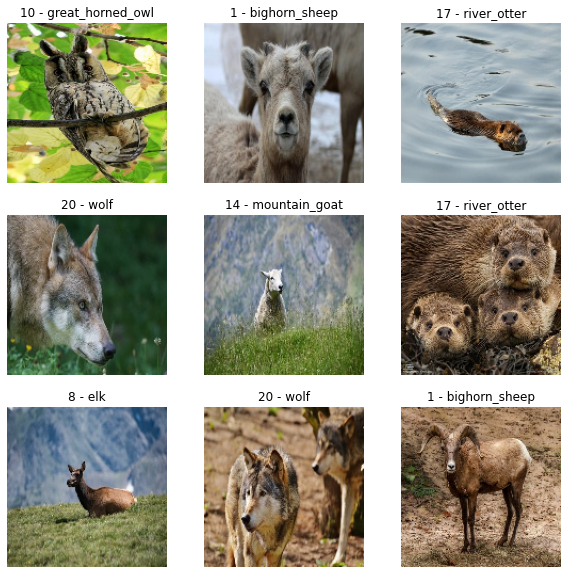

In [11]:
''' TODO: Visualization of images from the dataset.'''
# Choosing and showing 9 random images
# Label 1 is dog and label 0 is cat.
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(21):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        intlabel=labels[i].numpy()
        plt.title(str(intlabel)+ " - " + class_names[intlabel] )
        plt.axis("off")
plt.show()

In [12]:
# Prefetching
train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

# Data Augmentation and visualizing samples
Considering the rotation angle, focus when taking pictures, we use RandomFlip, RandomZoom and RandomRotation to augment datasets

In [13]:
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomZoom(0.1),
        layers.experimental.preprocessing.RandomRotation(0.2)
    ]
)

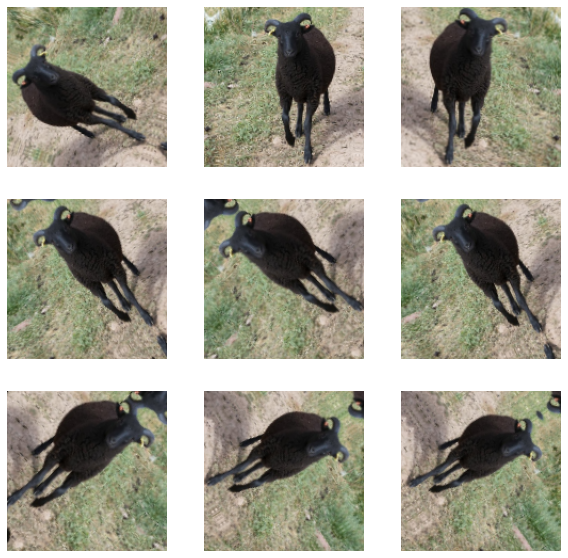

In [14]:
for images, _ in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    first_image = images[2]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0), training=True)
        plt.imshow(augmented_image[0].numpy().astype("int32"))
        plt.axis("off")

generate a training set and validation set with Data Augmentation

In [15]:
def preprocess(image, label):
    augment_image = data_augmentation(image)
    precess_img=keras.applications.inception_v3.preprocess_input(augment_image)
    return precess_img, label

In [16]:
from functools import partial
au_train_ds = train_ds.map(partial(preprocess)).prefetch(1)
au_val_ds = val_ds.map(preprocess).prefetch(1)

# Defining model, optimizer, loss, and metrics


In [17]:
''' TODO: Define a model to be used. '''
base_model = keras.applications.InceptionV3(
    weights="imagenet",  # Load weights pre-trained on ImageNet.
    input_shape=(150, 150, 3),
    include_top=False, # Do not include the ImageNet classifier at the top.
)

In [18]:

# Freeze the base_model
base_model.trainable = False

# Create new model on top
inputs = keras.Input(shape=(150, 150, 3))

x = base_model(inputs,training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(class_num, activation='softmax')(x)
model=keras.Model(inputs=inputs, outputs=outputs)

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
inception_v3 (Functional)    (None, 3, 3, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               524544    
_________________________________________________________________
batch_normalization_94 (Batc (None, 256)               1024      
_________________________________________________________________
activation_94 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0     

We also need to define optimizer, loss and accuracy.
- For optimizer, we choose Adam same as in task1
- loss function: there are 21 classes and labels are int, so we use SparseCategoricalCrossentropy.
- metric: Accuracy

In [20]:
model.compile(optimizer=keras.optimizers.Adam(lr=0.01, amsgrad=True),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
             )

# Training and Validation

In this section, train the model for 10 epochs and validate it. 

In [21]:
reduce_stopping_cb = keras.callbacks.ReduceLROnPlateau('val_accuracy',     #gradually reduce the learning rate 
                            patience=2,
                            factor=0.7,
                            min_delta=0.001,
                            min_lr=0.00001)

early_stopping_cb=keras.callbacks.EarlyStopping(monitor='val_accuracy',
                        patience=5,verbose=1, mode='auto')
checkpoint_cb = keras.callbacks.ModelCheckpoint(data_path +"task3.h5", save_best_only=True)

In [22]:
history = model.fit(au_train_ds,
           validation_data=au_val_ds,
           epochs=10,
           callbacks=[checkpoint_cb,early_stopping_cb,reduce_stopping_cb])

Epoch 1/10
50/50 [==============================] - 21s 261ms/step - loss: 1.9916 - accuracy: 0.4417 - val_loss: 1.7562 - val_accuracy: 0.6121
Epoch 2/10
50/50 [==============================] - 11s 213ms/step - loss: 1.1332 - accuracy: 0.6536 - val_loss: 1.7674 - val_accuracy: 0.5390
Epoch 3/10
50/50 [==============================] - 11s 214ms/step - loss: 1.0702 - accuracy: 0.6512 - val_loss: 1.4765 - val_accuracy: 0.5617
Epoch 4/10
50/50 [==============================] - 11s 214ms/step - loss: 0.9580 - accuracy: 0.7026 - val_loss: 1.3638 - val_accuracy: 0.6322
Epoch 5/10
50/50 [==============================] - 11s 214ms/step - loss: 0.8590 - accuracy: 0.7297 - val_loss: 1.2664 - val_accuracy: 0.6247
Epoch 6/10
50/50 [==============================] - 11s 216ms/step - loss: 0.7424 - accuracy: 0.7770 - val_loss: 1.1890 - val_accuracy: 0.6474
Epoch 7/10
50/50 [==============================] - 11s 213ms/step - loss: 0.7110 - accuracy: 0.7749 - val_loss: 1.4032 - val_accuracy: 0.6196

# Plotting training and validation loss values
### Analyzing the results

In this section, plot the training and validation losses **in the same plot** against the number of epochs.

In [23]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

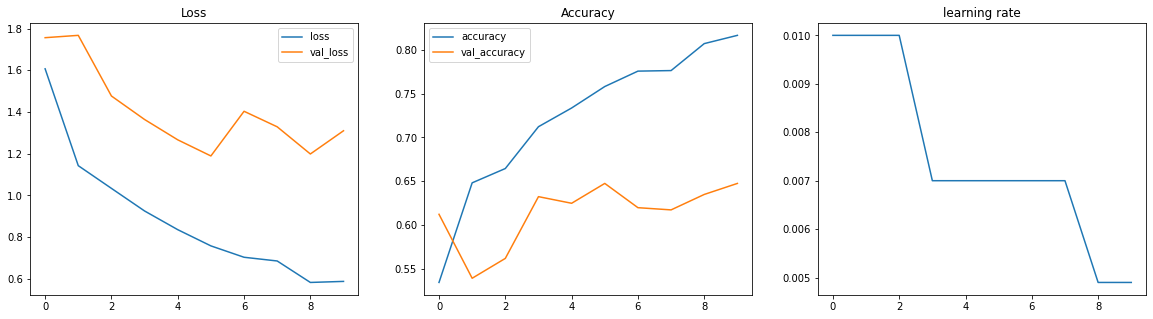

Max val_accuracy: 0.6473551392555237


In [24]:
import pandas as pd
pdhis=pd.DataFrame(history.history)
fig,axes=plt.subplots(1, 3, figsize=(20, 5))
pdhis[['loss','val_loss']].plot(ax=axes[0])
axes[0].set_title("Loss");
pdhis[['accuracy','val_accuracy']].plot(ax=axes[1])
axes[1].set_title("Accuracy");
pdhis['lr'].plot(ax=axes[2])
axes[2].set_title("learning rate");
plt.show()
print("Max val_accuracy: {}".format(pdhis['val_accuracy'].max()))

We can see that with the increase of epoches, accuracy and val_accuracy increase but loss and val_loss decrease. Compared with training data, the performance of validation data is worse.

# Plotting and visualizing the confusion matrix

In the following code box, first predict the class of all the validation images. Then create a confusion matrix using tf.math.confusion_matrix and then visualize it using the Seaborn package to find the most misclassified classes of images.

In [25]:
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [26]:
#extract all validation images and labels 
labels_numpy=[]
images_numpy=[]
for images, labels in au_val_ds:
  labels_numpy=np.append(labels_numpy,labels.numpy())
  images_numpy=np.append(images_numpy,images.numpy())
images_numpy=images_numpy.reshape(-1,150,150,3)

In [27]:
model.evaluate(images_numpy,labels_numpy)

13/13 [==============================] - 2s 40ms/step - loss: 1.2676 - accuracy: 0.6348


[1.267568826675415, 0.6347606778144836]

In [28]:
val_preds = model.predict(images_numpy)
val_preds_arg=tf.argmax(val_preds,axis=1)

In [29]:
cm = tf.math.confusion_matrix(labels_numpy, val_preds_arg)

'TODO: Create confusion matrix and visualize it. '

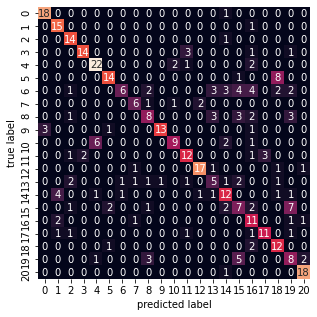

In [30]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False)
plt.ylabel('true label')
plt.xlabel('predicted label');
'''TODO: Create confusion matrix and visualize it. '''

We can see that most of the data is concentrated on the diagonal

#  Improvements
## Going back to model and data
Let's take a step back, look at the results and answer the questions mentioned in the handout and propose how you could improve the results.

**TODO: Explain in this box your plan of result improvement. **

We focus on constructing a better model
- adding data augmentation into model
- tuning learning rate
- add layers 
- unlock same layers in inception 

In [31]:
''' TODO: Do the updates here, train and validate the model again. Make sure that you are not continuing from the previous trained model.'''

' TODO: Do the updates here, train and validate the model again. Make sure that you are not continuing from the previous trained model.'

In [32]:
base_model2 = keras.applications.InceptionV3(
    weights="imagenet",  # Load weights pre-trained on ImageNet.
    input_shape=(150, 150, 3),
    include_top=False, # Do not include the ImageNet classifier at the top.
)

In [33]:
for i, layer in enumerate(base_model2.layers):
   print(i, layer.name)

0 input_3
1 conv2d_94
2 batch_normalization_95
3 activation_95
4 conv2d_95
5 batch_normalization_96
6 activation_96
7 conv2d_96
8 batch_normalization_97
9 activation_97
10 max_pooling2d_4
11 conv2d_97
12 batch_normalization_98
13 activation_98
14 conv2d_98
15 batch_normalization_99
16 activation_99
17 max_pooling2d_5
18 conv2d_102
19 batch_normalization_103
20 activation_103
21 conv2d_100
22 conv2d_103
23 batch_normalization_101
24 batch_normalization_104
25 activation_101
26 activation_104
27 average_pooling2d_9
28 conv2d_99
29 conv2d_101
30 conv2d_104
31 conv2d_105
32 batch_normalization_100
33 batch_normalization_102
34 batch_normalization_105
35 batch_normalization_106
36 activation_100
37 activation_102
38 activation_105
39 activation_106
40 mixed0
41 conv2d_109
42 batch_normalization_110
43 activation_110
44 conv2d_107
45 conv2d_110
46 batch_normalization_108
47 batch_normalization_111
48 activation_108
49 activation_111
50 average_pooling2d_10
51 conv2d_106
52 conv2d_108
53 conv

In [34]:
# Freeze the base_model
freeze_layer=247
for layer in base_model2.layers[:freeze_layer]: 
    layer.trainable = False
for layer in base_model2.layers[freeze_layer:]: #open some top inception layers
    layer.trainable = True

# Create new model on top
inputs = keras.Input(shape=(150, 150, 3))
x = data_augmentation(inputs)
x = keras.applications.inception_v3.preprocess_input(x)
x = base_model(x,training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256,kernel_initializer="lecun_normal")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(class_num, activation='softmax')(x)
model_improve=keras.Model(inputs=inputs, outputs=outputs)

In [35]:
model_improve.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 150, 150, 3)       0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 150, 150, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 150, 150, 3)       0         
_________________________________________________________________
inception_v3 (Functional)    (None, 3, 3, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               5245

In [36]:
model_improve.compile(optimizer=keras.optimizers.Adam(lr=0.01, amsgrad=True),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
             )

In [37]:
reduce_stopping_cb = keras.callbacks.ReduceLROnPlateau('val_accuracy',     #gradually reduce the learning rate 
                            patience=2,
                            factor=0.7,
                            min_delta=0.001,
                            min_lr=0.00001)

early_stopping_cb=keras.callbacks.EarlyStopping(monitor='val_accuracy',
                        patience=10,verbose=1, mode='auto')
checkpoint_cb2 = keras.callbacks.ModelCheckpoint(data_path +"task3_improve.h5", save_best_only=True)

In [38]:
history = model_improve.fit(train_ds,
           validation_data=val_ds,
           epochs=30,
           callbacks=[checkpoint_cb,early_stopping_cb,reduce_stopping_cb])

Epoch 1/30
50/50 [==============================] - 9s 97ms/step - loss: 2.3613 - accuracy: 0.3750 - val_loss: 1.8103 - val_accuracy: 0.6297
Epoch 2/30
50/50 [==============================] - 4s 74ms/step - loss: 1.4013 - accuracy: 0.5770 - val_loss: 1.1650 - val_accuracy: 0.6650
Epoch 3/30
50/50 [==============================] - 4s 76ms/step - loss: 1.3033 - accuracy: 0.5858 - val_loss: 1.0727 - val_accuracy: 0.6877
Epoch 4/30
50/50 [==============================] - 4s 76ms/step - loss: 1.1165 - accuracy: 0.6529 - val_loss: 1.0631 - val_accuracy: 0.6826
Epoch 5/30
50/50 [==============================] - 4s 76ms/step - loss: 1.1157 - accuracy: 0.6652 - val_loss: 1.1028 - val_accuracy: 0.6675
Epoch 6/30
50/50 [==============================] - 4s 75ms/step - loss: 1.0403 - accuracy: 0.6656 - val_loss: 0.9568 - val_accuracy: 0.7003
Epoch 7/30
50/50 [==============================] - 4s 76ms/step - loss: 0.9191 - accuracy: 0.6971 - val_loss: 0.8687 - val_accuracy: 0.6952
Epoch 8/30
50

In [39]:
''' TODO: Plot the training and validation loss graphs against epochs again and explain the improvement. '''

' TODO: Plot the training and validation loss graphs against epochs again and explain the improvement. '

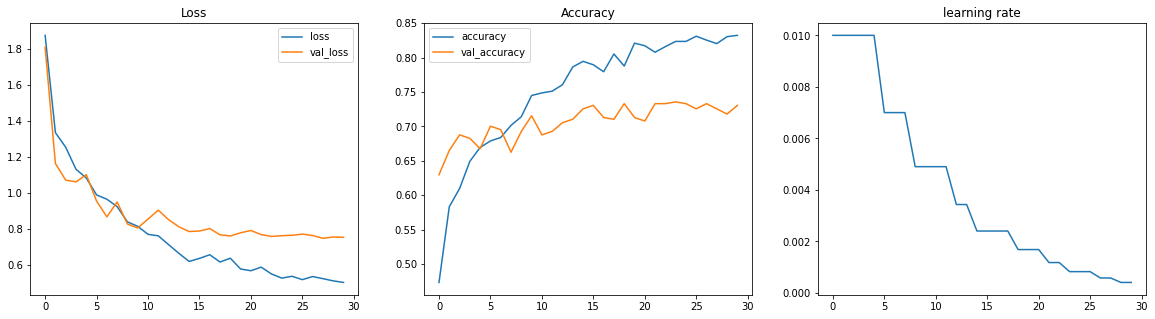

Max val_accuracy: 0.735516369342804


In [40]:
pdhis=pd.DataFrame(history.history)
fig,axes=plt.subplots(1, 3, figsize=(20, 5))
pdhis[['loss','val_loss']].plot(ax=axes[0])
axes[0].set_title("Loss");
pdhis[['accuracy','val_accuracy']].plot(ax=axes[1])
axes[1].set_title("Accuracy");
pdhis['lr'].plot(ax=axes[2])
axes[2].set_title("learning rate");
plt.show()
print("Max val_accuracy: {}".format(pdhis['val_accuracy'].max()))

We can conclude that the loss is lower and accuracy is higher